### Setup

In [123]:
import pandas as pd
import numpy as np
import timeit


# Завдання першого рівня
Виконати всі завдання, використовуючи як numpy array, так і dataframe, проаналізувати часові витрати на виконання процедур (профілювання часу виконання), зробити висновки щодо ситуацій, в яких має сенс віддати перевагу тій чи іншій структурі даних. Висновки оформити звітом із зазначеним часом виконання та оцінкою по 5-бальній шкалі зручності виконання операцій відбору).

In [99]:
# Зчитуємо дані
df = pd.read_csv("C:\\Users\\ASUS\\Downloads\\Нова папка (2)\\household_power_consumption.txt", sep=";", low_memory=False)
df.replace('?', pd.NA, inplace=True)
df.dropna(inplace=True)
nar = df.values
nar = np.delete(nar, np.where(nar == '?'), 0)

In [120]:
# Оптимізуємо типи даних
df = df.astype({
    'Global_active_power': 'float64',
    'Global_reactive_power': 'float64',
    'Voltage': 'float64',
    'Global_intensity': 'float64',
    'Sub_metering_1': 'float64',
    'Sub_metering_2': 'float64',
    'Sub_metering_3': 'float64',
})

In [121]:
df = df.astype

# Конвертація вибраних колонок у масив NumPy
ar = np.concatenate((nar[:, [0, 1]], nar[:, [2, 3, 4, 5]].astype(float), nar[:, [6, 7, 8]].astype(float).astype(int)), axis=1
)

# 1. Обрати всі домогосподарства, у яких загальна активна споживана потужність перевищує 5 кВт.

In [57]:
# Завдання 1: Фільтрація за умовою Global_active_power > 5


def get_df_first(df):
    df_first = df[df["Global_active_power"] > 5][["Date", "Time", 'Global_active_power', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_first

def get_ar_first(ar):
    ar_first = ar[ar[..., 2] > 5]
    return ar_first

# Замір часу виконання функцій
%timeit -r 2 -n 100 get_df_first(df)
%timeit -r 2 -n 100 get_ar_first(ar)

# Отримання результатів
df_first = get_df_first(df)
ar_first = get_ar_first(ar)


4.22 ms ± 126 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)
42.7 ms ± 22.2 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


# 2. Обрати всі домогосподарства, у яких вольтаж перевищую 235 В.

In [118]:
# Завдання 2: Фільтрація за умовою Voltage > 235
def get_df_second(df):
    df_second = df[df["Voltage"] > 235][["Date", "Time", 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_second

def get_ar_second(ar):
    ar_second = ar[ar[..., 4] > 235]
    return ar_second

# Замір часу виконання функцій
%timeit -r 2 -n 100 get_df_second(df)
%timeit -r 2 -n 100 get_ar_second(ar)

# Отримання результатів
df_second = get_df_second(df)
ar_second = get_ar_second(ar)

137 ms ± 401 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)
133 ms ± 180 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [122]:
pd.DataFrame.from_records(ar_second)[[0, 1, 4, 6, 7, 8]]

,0,1,4,6,7,8
0,16/12/2006,17:28:00,235.68,0,1,17
1,16/12/2006,17:29:00,235.02,0,2,17
2,16/12/2006,17:30:00,235.09,0,1,17
3,16/12/2006,17:31:00,235.22,0,1,17
4,16/12/2006,17:38:00,235.24,0,1,17
...,...,...,...,...,...,...
1952486,26/11/2010,20:58:00,240.43,0,0,0
1952487,26/11/2010,20:59:00,240.00,0,0,0
1952488,26/11/2010,21:00:00,239.82,0,0,0
1952489,26/11/2010,21:01:00,239.70,0,0,0


# 3. Обрати всі домогосподарства, у яких сила струму лежить в межах 19-20 А, для них виявити ті, у яких пральна машина та холодильних споживають більше, ніж бойлер та кондиціонер.

In [105]:
# Завдання 3: Складна фільтрація за декількома умовами

def get_df_third(df):
    df_third = df[(df["Global_intensity"] >= 19) & (df["Global_intensity"] <= 20) & (df["Sub_metering_2"] > df["Sub_metering_3"])][["Date", "Time", 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_third

def get_ar_third(ar):
    ar_third = ar[(ar[:, 5] >= 19) & (ar[:, 5] <= 20) & (ar[:, 7] > ar[:, 8])]
    return ar_third

# Замір часу виконання функцій
%timeit -r 2 -n 100 get_df_third(df)
%timeit -r 2 -n 100 get_ar_third(ar)

# Отримання результатів
df_third = get_df_third(df)
ar_third = get_ar_third(ar)




9.43 ms ± 1.03 ms per loop (mean ± std. dev. of 2 runs, 100 loops each)
87.9 ms ± 468 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [107]:
pd.DataFrame.from_records(ar_third)

,0,1,2,3,4,5,6,7,8
0,16/12/2006,18:09:00,4.464,0.136,234.66,19.0,0,37,16
1,17/12/2006,01:04:00,4.582,0.258,238.08,19.6,0,13,0
2,17/12/2006,01:08:00,4.618,0.104,239.61,19.6,0,27,0
3,17/12/2006,01:19:00,4.636,0.140,237.37,19.4,0,36,0
4,17/12/2006,01:20:00,4.634,0.152,237.17,19.4,0,35,0
...,...,...,...,...,...,...,...,...,...
2504,24/11/2010,07:53:00,4.666,0.000,235.72,19.8,0,39,17
2505,24/11/2010,07:54:00,4.694,0.000,236.78,19.8,0,39,18
2506,24/11/2010,07:55:00,4.602,0.000,237.08,19.4,0,40,17
2507,24/11/2010,07:56:00,4.536,0.000,237.03,19.0,0,39,17


# 4. Обрати випадковим чином 500000 домогосподарств (без повторів елементів вибірки), для них обчислити середні величини усіх 3-х груп споживання електричної енергії, а також

In [108]:
# Завдання 4: Додавання нового стовпця Average_of_3

def get_df_fourth(df):
    df['Average_of_3'] = (df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']) / 3
    df_fourth = df[["Date", "Time", 'Average_of_3', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']]
    return df_fourth

def get_ar_fourth(ar):
    a = np.average(ar[..., [6, 7, 8]], axis=1)
    ar_fourth = np.column_stack((ar[:, [0, 1, 6, 7, 8]], a.reshape(a.size, 1)))
    return ar_fourth

# Замір часу виконання функцій
%timeit -r 2 -n 100 get_df_fourth(df)
%timeit -r 2 -n 100 get_ar_fourth(ar)

# Отримання результатів
df_fourth = get_df_fourth(df)
ar_fourth = get_ar_fourth(ar)

164 ms ± 9.5 ms per loop (mean ± std. dev. of 2 runs, 100 loops each)
194 ms ± 958 µs per loop (mean ± std. dev. of 2 runs, 100 loops each)


In [111]:
pd.DataFrame.from_records(ar_fourth)

,0,1,2,3,4,5
0,16/12/2006,17:24:00,0,1,17,6.000000
1,16/12/2006,17:25:00,0,1,16,5.666667
2,16/12/2006,17:26:00,0,2,17,6.333333
3,16/12/2006,17:27:00,0,1,17,6.000000
4,16/12/2006,17:28:00,0,1,17,6.000000
...,...,...,...,...,...,...
2049275,26/11/2010,20:58:00,0,0,0,0.000000
2049276,26/11/2010,20:59:00,0,0,0,0.000000
2049277,26/11/2010,21:00:00,0,0,0,0.000000
2049278,26/11/2010,21:01:00,0,0,0,0.000000


# 5. Обрати ті домогосподарства, які після 18-00 споживають понад 6 кВт за хвилину в середньому, серед відібраних визначити ті, у яких основне споживання електроенергії у вказаний проміжок часу припадає на пральну машину, сушарку, холодильник та освітлення (група 2 є найбільшою), а потім обрати кожен третій результат із першої половини та кожен четвертий результат із другої половини.

In [112]:
# Завдання 5: Складна фільтрація за декількома умовами

def get_fifth_df(df):
    fifth_df = df[(df['Time'] >= "18:30:00") & (df['Global_active_power'] > 6) & (df["Sub_metering_2"] > df["Sub_metering_1"]) & (df["Sub_metering_2"] > df["Sub_metering_3"])]
    
    order = []
    for i in range(0, len(fifth_df)//2, 3):
        order.append(fifth_df.iloc[i])
    for i in range(len(fifth_df)//2, len(fifth_df), 4):
        order.append(fifth_df.iloc[i])

    df_fifth = pd.DataFrame.from_records(order)
    return df_fifth

def get_fifth_ar(ar):
    ar_fifth = ar[(ar[..., 1] >= "18:30:00") & (ar[..., 2] > 6) & (ar[..., 7] > ar[..., 8]) & (ar[..., 7] > ar[..., 6])]
    
    order = []
    for i in range(0, len(ar_fifth)//2, 3):
        order.append(ar_fifth[i])
    for i in range(len(ar_fifth)//2, len(ar_fifth), 4):
        order.append(ar_fifth[i])
    
    fifth_ar = pd.DataFrame.from_records(order).values
    return fifth_ar

# Замір часу виконання функцій
%timeit -r 2 -n 10 get_fifth_df(df)
%timeit -r 2 -n 10 get_fifth_ar(ar)

# Отримання результатів
fifth_df = get_fifth_df(df)
fifth_ar = get_fifth_ar(ar)


85.5 ms ± 2.05 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)
105 ms ± 3.64 ms per loop (mean ± std. dev. of 2 runs, 10 loops each)


In [113]:
fifth_df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Average_of_3
0,16/12/2006,18:35:00,6.072,0.000,232.48,26.4,0.0,27.0,17.0,14.666667
1,28/12/2006,21:00:00,6.376,0.252,235.94,27.4,1.0,53.0,17.0,23.666667
2,28/12/2006,21:03:00,7.906,0.286,235.93,33.6,1.0,73.0,17.0,30.333333
3,28/12/2006,21:06:00,7.184,0.000,235.70,30.4,2.0,73.0,17.0,30.666667
4,28/12/2006,21:09:00,7.210,0.000,236.14,30.4,1.0,73.0,17.0,30.333333
...,...,...,...,...,...,...,...,...,...,...
273,20/11/2010,18:30:00,6.620,0.314,229.00,29.2,18.0,34.0,16.0,22.666667
274,20/11/2010,18:34:00,6.266,0.360,229.82,27.6,14.0,35.0,16.0,21.666667
275,20/11/2010,18:38:00,6.302,0.376,229.65,27.8,15.0,34.0,17.0,22.000000
276,20/11/2010,18:42:00,6.238,0.344,229.37,27.6,14.0,35.0,16.0,21.666667


In [114]:
pd.DataFrame.from_records(fifth_ar)

,0,1,2,3,4,5,6,7,8
0,16/12/2006,18:35:00,6.072,0.000,232.48,26.4,0,27,17
1,28/12/2006,21:00:00,6.376,0.252,235.94,27.4,1,53,17
2,28/12/2006,21:03:00,7.906,0.286,235.93,33.6,1,73,17
3,28/12/2006,21:06:00,7.184,0.000,235.70,30.4,2,73,17
4,28/12/2006,21:09:00,7.210,0.000,236.14,30.4,1,73,17
...,...,...,...,...,...,...,...,...,...
273,20/11/2010,18:30:00,6.620,0.314,229.00,29.2,18,34,16
274,20/11/2010,18:34:00,6.266,0.360,229.82,27.6,14,35,16
275,20/11/2010,18:38:00,6.302,0.376,229.65,27.8,15,34,17
276,20/11/2010,18:42:00,6.238,0.344,229.37,27.6,14,35,16



# Завдання другого рівня
Виконати всі завдання, використовуючи як numpy array, так і dataframe

Датасет має відповідати таким вимогам:

Data Set Characteristics: Multivariate
Attribute Characteristics: Categorical, Integer, Real
Number of Attributes: at least 2 integers/real
Missing Values? YES!!!!!

In [40]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv(url, header=None, names=column_names)

# 1. Поборотися із зниклими даними.

In [41]:
# Завдання 1: Обробка пропущених значень за допомогою медіани
print("Пропущені значення до обробки:")
print(df.isnull().sum())

# Припускаючи, що в Iris dataset немає пропущених значень, додаткової обробки для Завдання 1 не потрібно.


Пропущені значення до обробки:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


# 2. Пронормувати вибраний датасет або стандартизувати його.

In [43]:
# Завдання 2: Нормалізація (Мін-Макс шкалювання)
def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

# Застосування нормалізації до вибраних числових стовпців
numeric_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df[numeric_columns] = normalize_data(df[numeric_columns])

# Альтернативно, можна реалізувати Стандартизацію (Z-перетворення)
# def стандартизувати_дані(data):
#     return (data - data.mean()) / data.std()
# df[numeric_columns] = стандартизувати_дані(df[numeric_columns])

# 3. Збудувати гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

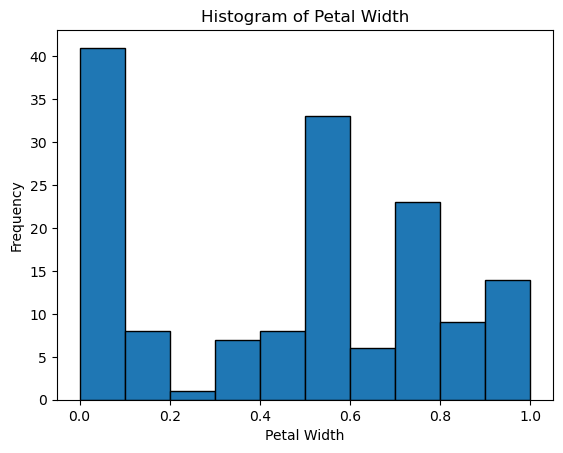

In [104]:
# Task 3: Build a histogram
plt.hist(df['petal_width'], bins=10, edgecolor='black')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Width')
plt.show()

# 4. Збудувати графік залежності одного integer/real атрибута від іншого.

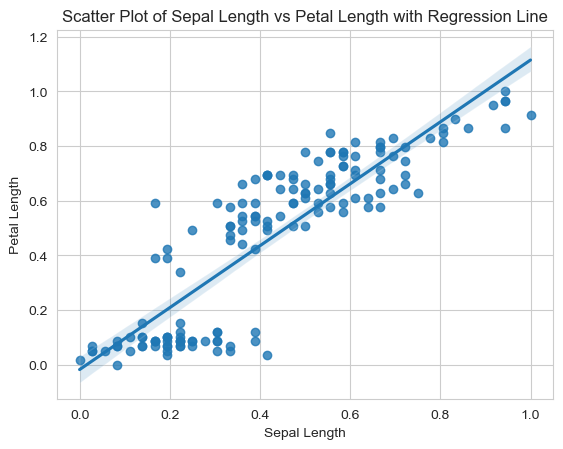

In [114]:
# Task 4: Scatter plot with regression line using Seaborn
sns.set_style("whitegrid")
sns.regplot(x='sepal_length', y='petal_length', data=df)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Scatter Plot of Sepal Length vs Petal Length with Regression Line')
plt.show()

# 5. Підрахувати коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів.

In [106]:
# Task 5: Calculate Pearson and Spearman correlation
pearson_corr, _ = scipy.stats.pearsonr(df['sepal_length'], df['petal_length'])
spearman_corr, _ = scipy.stats.spearmanr(df['sepal_length'], df['petal_length'])

print(f"Pearson correlation: {pearson_corr}")
print(f"Spearman correlation: {spearman_corr}")

Pearson correlation: 0.8717541573048712
Spearman correlation: 0.8813863932886515


# 6. Провести One Hot Encoding категоріального string атрибуту.

In [44]:
# Припустимо, що ми хочемо застосувати One Hot Encoding до категоріального стовпця 'class'
df_one_hot = pd.get_dummies(df, columns=['class'])

# Перетворити в numpy array
ar_one_hot = df_one_hot.values

# Вивести результати
print("DataFrame після застосування One Hot Encoding:")
print(df_one_hot.head())

print("\nNumpy array після застосування One Hot Encoding:")
print(ar_one_hot[:5, :]) 


DataFrame після застосування One Hot Encoding:
   sepal_length  sepal_width  petal_length  petal_width  class_Iris-setosa  \
0      0.222222     0.625000      0.067797     0.041667                  1   
1      0.166667     0.416667      0.067797     0.041667                  1   
2      0.111111     0.500000      0.050847     0.041667                  1   
3      0.083333     0.458333      0.084746     0.041667                  1   
4      0.194444     0.666667      0.067797     0.041667                  1   

   class_Iris-versicolor  class_Iris-virginica  
0                      0                     0  
1                      0                     0  
2                      0                     0  
3                      0                     0  
4                      0                     0  

Numpy array після застосування One Hot Encoding:
[[0.22222222 0.625      0.06779661 0.04166667 1.         0.
  0.        ]
 [0.16666667 0.41666667 0.06779661 0.04166667 1.         0.
  0.  

# 7. Провести візуалізацію багатовимірних даних.

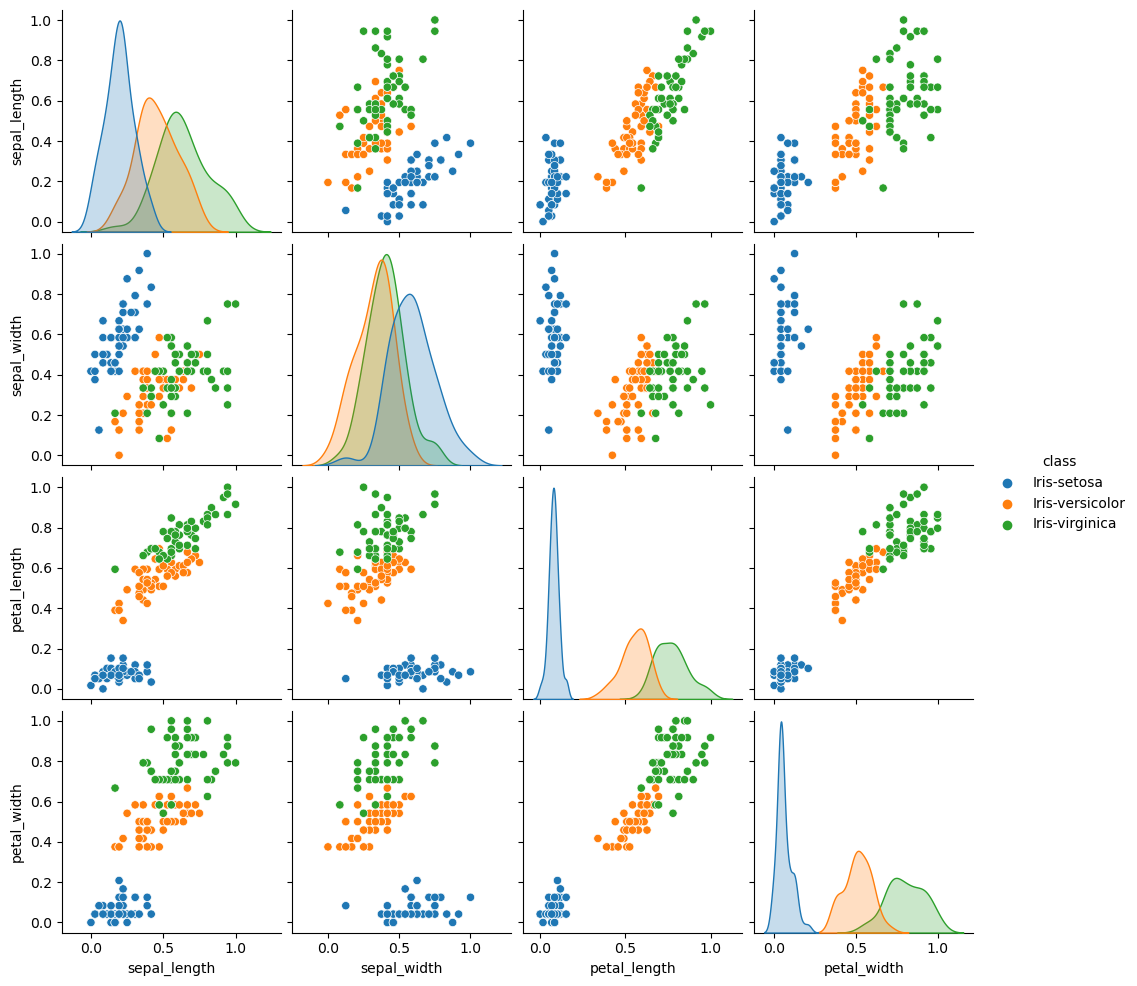

In [108]:
# Task 7: Multidimensional Data Visualization
# Example using pairplot
sns.pairplot(df, hue='class')
plt.show()